# Tellurium
Some tests with tellurium

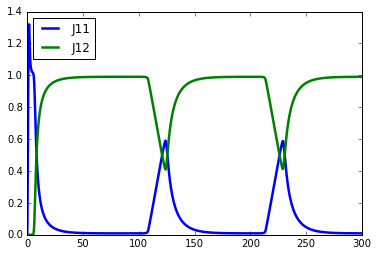

array([ -5.88843833e-07,  -8.84718481e-02,   5.09021919e-04,
        -2.05092651e-03,   6.83642169e-04,  -1.93244611e-03,
         1.92823525e-03])

In [6]:
%matplotlib inline
# Main project
import tellurium as te

# model Definition
r = te.loada ('''
        #J1: S1 -> S2; Activator*kcat1*S1/(Km1+S1);
        J1: S1 -> S2; SE2*kcat1*S1/(Km1+S1);
        J2: S2 -> S1; Vm2*S2/(Km2+S2);
        
        J3: T1 -> T2; S2*kcat3*T1/(Km3+T1);
        J4: T2 -> T1; Vm4*T2/(Km4+T2);
        
        J5:    -> E2; Vf5/(Ks5+T2^h5);
        J6:    -> E3; Vf6*T2^h6/(Ks6+T2^h6);
        
        #J7:    -> E1;
        J8:    ->  S; kcat8*E1
        
        J9: E2 ->   ; k9*E2;
        J10:E3 ->   ; k10*E3;
        
        J11: S -> SE2; E2*kcat11*S/(Km11+S);
        J12: S -> SE3; E3*kcat12*S/(Km12+S);
        
        J13: SE2 ->  ; SE2*kcat13; 
        J14: SE3 ->  ; SE3*kcat14; 
        
        Km1 = 0.01; Km2 = 0.01; Km3 = 0.01; Km4 = 0.01; Km11 = 1; Km12 = 0.1;
        S1 = 6; S2 =0.1; T1=6; T2 = 0.1;
        SE2 = 0; SE3=0;
        S=0;
        E2 = 0; E3 = 0;
        kcat1 = 0.1; kcat3 = 3; kcat8 =1; kcat11 = 1; kcat12 = 1; kcat13 = 0.1; kcat14=0.1;
        E1 = 1;
        k9 = 0.1; k10=0.1;
        Vf6 = 1;
        Vf5 = 3;
        Vm2 = 0.1;
        Vm4 = 2;
        h6 = 2; h5=2;
        Ks6 = 1; Ks5 = 1;
        Activator = 0;

        at (time > 100): Activator = 5;  
''')

r.conservedMoietyAnalysis = True

result = r.simulate (0, 300, 2000, ['time', 'J11', 'J12']);
r.plot(result);

r.dv()

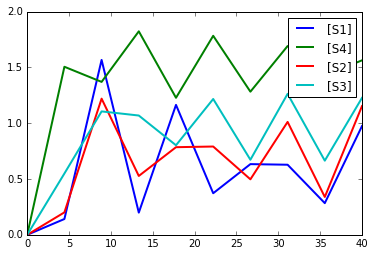

<roadrunner.RoadRunner() { 
'this' : 0x3789cb0
'modelLoaded' : true
'modelName' : feedback
'libSBMLVersion' : LibSBML Version: 5.11.0
'jacobianStepSize' : 1e-05
'conservedMoietyAnalysis' : false
'simulateOptions' : 
< roadrunner.SimulateOptions() 
{ 
'this' : 0x3dbbe30, 
'reset' : 0,
'structuredResult' : 0,
'copyResult' : 1,
'steps' : 50,
'start' : 0,
'duration' : 40
}>, 
'integrator' : 
< roadrunner.Integrator() >
  settings:
      relative_tolerance: 0.00001
      absolute_tolerance: 0.0000000001
                   stiff: true
       maximum_bdf_order: 5
     maximum_adams_order: 12
       maximum_num_steps: 20000
       maximum_time_step: 0
       minimum_time_step: 0
       initial_time_step: 0
          multiple_steps: false
      variable_step_size: false

}>
(10, 5)


In [54]:
# http://tellurium.analogmachine.org/testing/
import tellurium as te
r = te.loada ('''
model feedback()
   // Reactions:
   J0: $X0 -> S1; (VM1 * (X0 - S1/Keq1))/(1 + X0 + S1 +   S4^h);
   J1: S1 -> S2; (10 * S1 - 2 * S2) / (1 + S1 + S2);
   J2: S2 -> S3; (10 * S2 - 2 * S3) / (1 + S2 + S3);
   J3: S3 -> S4; (10 * S3 - 2 * S4) / (1 + S3 + S4);
   J4: S4 -> $X1; (V4 * S4) / (KS4 + S4);

  // Species initializations:
  S1 = 0; S2 = 0; S3 = 0;
  S4 = 0; X0 = 10; X1 = 0;

  // Variable initialization:
  VM1 = 10; Keq1 = 10; h = 10; V4 = 2.5; KS4 = 0.5;
end''')

res = r.simulate(0, 40, 10)
r.plot()
print(r)

print(res.shape)

In [50]:
# Testing
import roadrunner
roadrunner.testing.tester.runTester()



Starting Test on  /usr/local/lib/python2.7/dist-packages/roadrunner/testing/test_data/Two_Cycles.rrtest
Successfully loaded model.

Check [Set Steady State Selection List]      PASS
Computing Steady State.  Distance to SteadyState: 2.26189339422e-07
Check [Get Steady State Selection List]      PASS
Check [Species Concentrations]               PASS
Computing Steady State.  Distance to SteadyState: 3.61462428791e-15
Check [Steady State Fluxes]                  PASS
Check [Get Reaction Rates]                   PASS
Check [Full Jacobian]                        PASS
Check [Reduced Jacobian]                     PASS
Check [Individual Eigenvalues]               PASS
Check [Eigenvalue Matrix]                    PASS
Check [Reduced Eigenvalue Matrix]            PASS
Check [Stoichiometry Matrix]                 PASS
Check [Reduced Stoichiometry Matrix]         PASS
Check [Link Matrix]                          PASS
Check [Unscaled Elasticity Matrix]           PASS
Check [Scaled Elasticity Matri

0

## Bistable
Example showing how to to multiple time course simulations, merging the data and plotting it onto one platting surface. Alternative is to use setHold()

Model is a bistable system, simulations start with different initial conditions resulting in different steady states reached.

In [20]:
import tellurium as te
import numpy as np

r = te.loada ('''
$Xo -> S1; 1 + Xo*(32+(S1/0.75)^3.2)/(1 +(S1/4.3)^3.2);
S1 -> $X1; k1*S1;

Xo = 0.09; X1 = 0.0;
S1 = 0.5; k1 = 3.2;
''')

??np.hstack

print(r.selections)

initValue = 0.05
m = np.linspace(0,4,101)
print(m)

for i in range (0,12):
    r.model.S1 = initValue
    res = r.simulate (0, 4, 100)
    data = res['[S1]']
    print(data.size)
    m = np.concatenate([m, data], axis=1)
    initValue += 1

te.plotArray (m)

['time', '[S1]']
[ 0.    0.04  0.08  0.12  0.16  0.2   0.24  0.28  0.32  0.36  0.4   0.44
  0.48  0.52  0.56  0.6   0.64  0.68  0.72  0.76  0.8   0.84  0.88  0.92
  0.96  1.    1.04  1.08  1.12  1.16  1.2   1.24  1.28  1.32  1.36  1.4
  1.44  1.48  1.52  1.56  1.6   1.64  1.68  1.72  1.76  1.8   1.84  1.88
  1.92  1.96  2.    2.04  2.08  2.12  2.16  2.2   2.24  2.28  2.32  2.36
  2.4   2.44  2.48  2.52  2.56  2.6   2.64  2.68  2.72  2.76  2.8   2.84
  2.88  2.92  2.96  3.    3.04  3.08  3.12  3.16  3.2   3.24  3.28  3.32
  3.36  3.4   3.44  3.48  3.52  3.56  3.6   3.64  3.68  3.72  3.76  3.8
  3.84  3.88  3.92  3.96  4.  ]
100


IndexError: axis 1 out of bounds [0, 1)

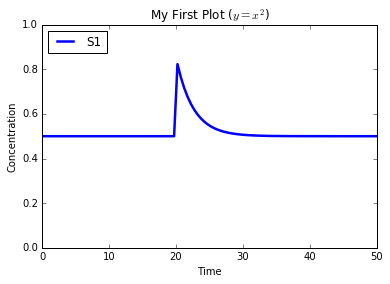

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

In [21]:
import tellurium as te
import numpy
import matplotlib.pyplot as plt
import roadrunner

# Example showing how to embelise a graph, change title, axes labels.
# Example also uses an event to pulse S1

r = te.loada ('''
   $Xo -> S1; k1*Xo;
   S1 -> $X1; k2*S1;
   
   k1 = 0.2; k2 = 0.4; Xo = 1; S1 = 0.5;
   at (time > 20): S1 = S1 + 0.35
''')

# Simulate the first part up to 20 time units
m = r.simulate (0, 50, 100, ["time", "S1"]);

plt.ylim ((0,1))
plt.xlabel ('Time')
plt.ylabel ('Concentration')
plt.title ('My First Plot ($y = x^2$)')
r.plot (m)

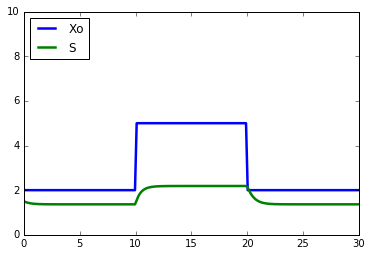

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

In [23]:
import tellurium as te
import matplotlib.pyplot as plt

# Example showing use of events and how to set the y axis limits
r = te.loada ('''
  $Xo -> S;   Xo/(km + S^h);
  S -> $w;  k1*S;       

     # initialize
     h = 1;   # Hill coefficient
     k1 = 1;  km = 0.1;
     S = 1.5; Xo = 2
     
     at (time > 10): Xo = 5;
     at (time > 20): Xo = 2;
''')

m1 = r.simulate (0, 30, 200, ['time', 'Xo', 'S'])

plt.ylim ((0,10))
r.plot (m1)

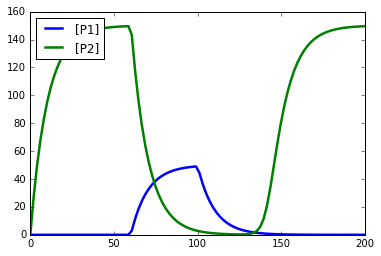

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

In [25]:
import tellurium as te
import numpy

# Model desribes a cascade of two genes. First gene is activated
# second gene is repressed. Uses events to change the input 
# to the gene regulatory network

r = te.loada ('''
    v1:  -> P1; Vm1*I^4/(Km1 + I^4);
    v2:  P1 -> ; k1*P1;
    v3:  -> P2;  Vm2/(Km2 + P1^4);
    v4:  P2 -> ; k2*P2;
    
    at (time > 60): I = 10;
    at (time > 100): I = 0.01;
    Vm1  = 5; Vm2 = 6; Km1 = 0.5; Km2 = 0.4;
    k1 = 0.1; k2 = 0.1;
    I = 0.01;
''')

result = r.simulate (0, 200, 100)
r.plot (result)

In [28]:
import tellurium as te

# Example of using antimony to create a stoichiometry matrix 
r = te.loada ('''
 -> S1; v1;
 S1 -> S2; v2;
 S2 -> ; v3;
 S3 -> S1; v4;
 S3 -> S2; v5;
 -> S3; v6;
''')

print r.getFullStoichiometryMatrix()

ERROR: An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 0))



Exception: Antimony: Error in model string, line 2:  syntax error, unexpected '>', expecting number

## Lorent attractor
Example showing how to describe a model using ODES. Example implements the Lorenz attractor.

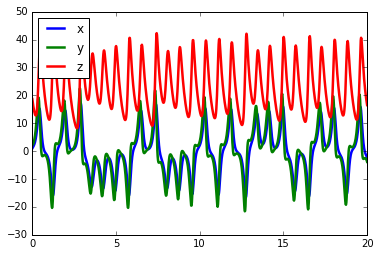

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

In [31]:
import tellurium as te

r = te.loada ('''
     x' = sigma*(y - x);
     y' = x*(rho - z) - y;
     z' = x*y - beta*z;

     x = 0.96259;  y = 2.07272;  z = 18.65888;

     sigma = 10;  rho = 28; beta = 2.67;
''')

result = r.simulate (0, 20, 1000, ['time', 'x', 'y', 'z'])
r.plot (result)

In [32]:
# Time Course Parameter Scan
# Do 5 simulations on a simple model, for each simulation
# a parameter, k1 is changed. The script merges the data together
# and plots the merged array on to one plot. The alternative is
# is to use the setHold method and to plot each graph individually.

import tellurium as te
import numpy

r = te.loada ('''
    J1: $X0 -> S1; k1*X0;
    J2: S1 -> $X1; k2*S1;

    X0 = 1.0; S1 = 0.0; X1 = 0.0;
    k1 = 0.4; k2 = 2.3;
''')  
  
  
m = r.simulate (0, 4, 100, ["Time", "S1"])
for i in range (0,4):
    r.model.k1 = r.model.k1 + 0.1 
    r.reset()
    m = numpy.hstack ((m, r.simulate (0, 4, 100, ['S1'])))

# MUST use plotArray to plot merged data
te.plotArray (m)

AttributeError: k1

In [33]:
import tellurium as te
import numpy

# Example of merging multiple simulations. In between simulations
# a parameter is changed.

r = te.loada ('''
    # Model Definition
    v1: $Xo -> S1;  k1*Xo;
    v2: S1 -> $w;   k2*S1;

    # Initialize constants 
    k1 = 1; k2 = 1; S1 = 15; Xo = 1;
''')

# Time course simulation
m1 = r.simulate (0, 15, 100, ["Time","S1"]);
r.model.k1 = r.model.k1 * 6;
m2 = r.simulate (15, 40, 100, ["Time","S1"]);
r.model.k1 = r.model.k1 / 6;
m3 = r.simulate (40, 60, 100, ["Time","S1"]);

m = numpy.vstack ((m1, m2, m3)); # Merge data
r.plot (m)

AttributeError: k1

## Relaxation oscillator
Oscillator that uses positive and negative feedback.
An example of a relaxation oscillator.

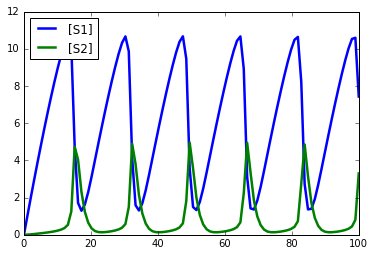

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

In [36]:
import tellurium as te

r = te.loada ('''
  v1: $Xo -> S1; k1*Xo;
  v2:  S1 -> S2; k2*S1*S2^h/(10 + S2^h) + k3*S1;
  v3:  S2 -> $w; k4*S2;      

  # Initialize
  h  = 2; # Hill coefficient
  k1 = 1; k2 = 2; Xo = 1;
  k3 = 0.02; k4 = 1;
''')

result = r.simulate (0, 100, 100)
r.plot (result)


In [38]:
import tellurium as te
import numpy

# Negative Feedback model where we scan over the value
# of the Hill coefficient.

r = te.loada ('''
  // Reactions:
  J0: $X0 => S1; (J0_VM1*(X0 - S1/J0_Keq1))/(1 + X0 + S1 + S4^J0_h);
  J1: S1 => S2; (10*S1 - 2*S2)/(1 + S1 + S2);
  J2: S2 => S3; (10*S2 - 2*S3)/(1 + S2 + S3);
  J3: S3 => S4; (10*S3 - 2*S4)/(1 + S3 + S4);
  J4: S4 => $X1; (J4_V4*S4)/(J4_KS4 + S4);

  // Species initializations:
  S1 = 0;
  S2 = 0;
  S3 = 0;
  S4 = 0;
  X0 = 10;
  X1 = 0;

  // Variable initializations:
  J0_VM1 = 10;
  J0_Keq1 = 10;
  J0_h = 2;
  J4_V4 = 2.5;
  J4_KS4 = 0.5;

  // Other declarations:
  const compartment_, J0_VM1, J0_Keq1, J0_h, J4_V4, J4_KS4;
''')

result = r.simulate (0, 20,200, ['time', 'S1'], reset=True)
for i in range (0,8):
    m = r.simulate (0, 20, 200, ['S1'], reset = True)
    result = numpy.hstack ((result, m))
    r.model.J0_h = r.model.J0_h + 1
    
te.plotArray(result)

ERROR: An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 0))



RuntimeError: Global parameter 'compartment_' missing value and missing init assignment and assignment rule!

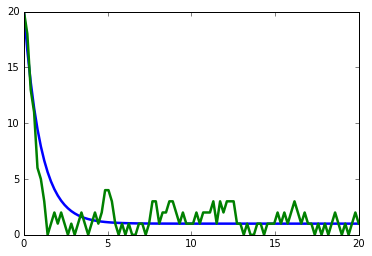

In [39]:
import tellurium as te
import numpy
import matplotlib.pyplot as plt


# Using setHold to compare to simulaton runs. In tihs case one
# simulation is a determinsitic run and the second is a stochastic
# simulation.

r = te.loada ('''
     v1: $Xo -> S1;  k1*Xo;
     v2: S1 -> $w;   k2*S1;

     //initialize.  Deterministic process.
     k1 = 1; k2 = 1; S1 = 20; Xo = 1;
''')

m1 = r.simulate (0,20,100);

# Stochastic process
r.resetToOrigin()
m2 = r.gillespie (0, 20, 100, ['time', 'S1'])

# plot all the results together
te.setHold (True)
te.plotArray (m1)
te.plotArray (m2)

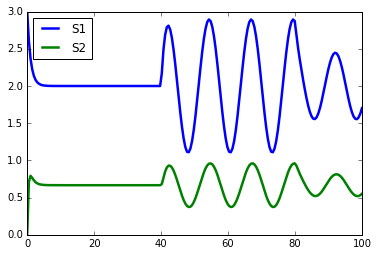

<module 'matplotlib.pyplot' from '/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.pyc'>

In [40]:
import tellurium as te
import numpy

# Example that show how to inject a sinusoidal into the model
# and use events to switch it off and on

r = te.loada ('''
    # Inject sin wave into model    
    Xo := sin (time*0.5)*switch + 2;    
    
    # Model Definition
    v1: $Xo -> S1;  k1*Xo;
    v2: S1 -> S2;   k2*S1;
    v3: S2 -> $X1;  k3*S2;

    at (time > 40): switch = 1;
    at (time > 80): switch = 0.5;
    
    # Initialize constants 
    k1 = 1; k2 = 1; k3 = 3; S1 = 3; 
    S2 = 0; 
    switch = 0;
''')

result = r.simulate (0, 100, 200, ['time', 'S1', 'S2'])
r.plot (result)

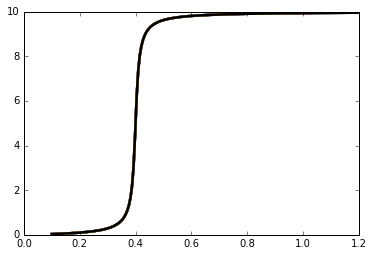

In [45]:
import tellurium as te
import numpy as np

# Simple protein phosphorylation cycle. Steady state concentation
# of the phosphorylated protein is plotted as a funtion of the cycle
# kinase. In addition, the plot is repeated for various values of Km.

r = te.loada ('''
   S1 -> S2; k1*S1/(Km1 + S1);
   S2 -> S1; k2*S2/(Km2 + S2);
   
   k1 = 0.1; k2 = 0.4; S1 = 10; S2 = 0;
   Km1 = 0.1; Km2 = 0.1;  
''')

r.conservedMoietyAnalysis = True

te.setHold (True)
for i in range (1,8):
  numbers = np.linspace (0.1, 1.2, 200)
  result = np.empty ([0,2])
  for value in numbers:
      r.k1 = value
      r.steadyState()
      row = np.array ([value, r.S2])
      result = np.vstack ((result, row))
  te.plotArray (result)
  r.model.k1 = 0.1
  r.model.Km1 = r.Km1 + 0.5;
  r.model.Km2 = r.Km2 + 0.5;

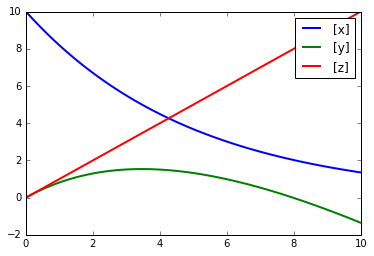

[x] at final timepoint: 1.35331946673
[x] after vol change: 0.676659733363
c after vol change: 2.0
[x] after floating conc reset: 10.0
x after floating conc reset: 20.0
[x] after floating amount reset: 5.0
x after floating amount reset: 10.0


In [48]:
%matplotlib inline
import roadrunner
from roadrunner import SelectionRecord
from roadrunner import Config, SelectionRecord, Logger

#Logger.setLevel(Logger.LOG_DEBUG)

import tellurium as te

m = te.loada('''
var species x in c, y in c, z in c
compartment c = 1.0

x -> y ; k*x
y -> z; 1

x = 10
y = 0
z = 0

k = 0.2


''')
#at time>5: c=2.0

r = m.simulate(0,10,100,['time','[x]','[y]','[z]'])
# print(r)
m.plot()

print('[x] at final timepoint: {}'.format(m.model.getValue('[x]')))
m.model.setValue('c', 2.)
print('[x] after vol change: {}'.format(m.model.getValue('[x]')))
print('c after vol change: {}'.format(m.model.getValue('c')))
m.reset(SelectionRecord.INITIAL_FLOATING_CONCENTRATION)

print('[x] after floating conc reset: {}'.format(m.model.getValue('[x]')))
print('x after floating conc reset: {}'.format(m.model.getValue('x')))

m.reset(SelectionRecord.INITIAL_FLOATING_AMOUNT)
print('[x] after floating amount reset: {}'.format(m.model.getValue('[x]')))
print('x after floating amount reset: {}'.format(m.model.getValue('x')))

